In [3]:
from CentralStreamingModel.utils.read_probabilities_mass import VD as VD_mass
from CentralStreamingModel.utils.read_probabilities import VD 

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.ticker import NullFormatter
from CentralStreamingModel.utils.plot_tools import plot_mean_attribute,\
                compute_mean_error
    
sns.set_context('talk')

In [2]:
n_boxes = range(1,16)
boxsize = 2000
snapshot = 20

In [4]:
mass_sample = []
for i, box in enumerate(n_boxes):
    mass_sample.append(VD_mass(box, boxsize, snapshot))


/home/c-cuesta/CentralStreamingModel/utils/read_probabilities_mass.py:41: RuntimeWarning: invalid value encountered in true_divide
  self.jointpdf = self.npairs / norm[:,:,:,np.newaxis,np.newaxis]
/home/c-cuesta/CentralStreamingModel/utils/read_probabilities_mass.py:67: RuntimeWarning: invalid value encountered in true_divide
  skewness =	wv * np.sum((v - mean_expand)**3 * marginal, axis=-1)/std**3
/home/c-cuesta/CentralStreamingModel/utils/read_probabilities_mass.py:68: RuntimeWarning: invalid value encountered in true_divide
  kurtosis =	wv * np.sum((v - mean_expand)**4 * marginal, axis=-1)/std**4


In [7]:
central_halos = []
for i, box in enumerate(n_boxes):
    central_halos.append(VD(box, boxsize, snapshot))


In [48]:
bins_dir = '/home/c-cuesta/CentralPairwiseVel/bins/'
n_halos = np.loadtxt(bins_dir + 'number_halos.txt')
mass_bins = np.loadtxt(bins_dir + 'mass_bins.txt')

mass_bins_c = 0.5 * (mass_bins[1:] + mass_bins[:-1])

In [19]:
mean_marginal_r, std_marginal_r = compute_mean_error(central_halos, 'marginal', 'r')
mean_mass_marginal_r, std_mass_marginal_r = compute_mean_error(mass_sample, 'marginal', 'r')


In [51]:
mean_marginal_t, std_marginal_t = compute_mean_error(central_halos, 'marginal', 't')
mean_mass_marginal_t, std_mass_marginal_t = compute_mean_error(mass_sample, 'marginal', 't')


In [74]:
# go from mass to central marginal radial PDF, show the different contributions
total_n_halos = np.sum(n_halos)

In [88]:
mean_mass_jointpdf = np.mean([h.jointpdf for h in mass_sample] , axis = 0)

In [89]:
m1 = n_halos[np.newaxis,:, np.newaxis, np.newaxis, np.newaxis] * mean_mass_jointpdf/total_n_halos
m2 = n_halos[np.newaxis,np.newaxis, :, np.newaxis, np.newaxis] * m1 /total_n_halos

In [90]:
total_jointpdf =  np.sum(np.sum(m2,axis=1),axis=1)

In [96]:
total_marginal_r = mass_sample[0].wvt * np.sum(total_jointpdf, axis = -2)
total_marginal_t = mass_sample[0].wvt * np.sum(total_jointpdf, axis = -1)

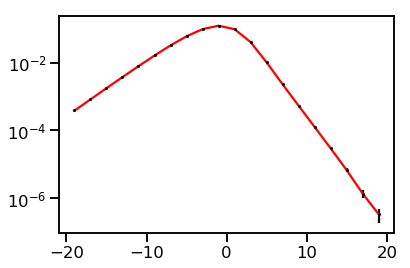

In [148]:
r = 15
ax = plt.subplot()
ax.set_yscale("log", nonposy='clip')
plt.errorbar(central_halos[0].v.r, mean_marginal_r[r],
          yerr =std_marginal_r[r], linestyle = '', 
             marker='o', markersize=2, color='black')

plt.plot(central_halos[0].v.r, total_marginal_r[r], color='red')


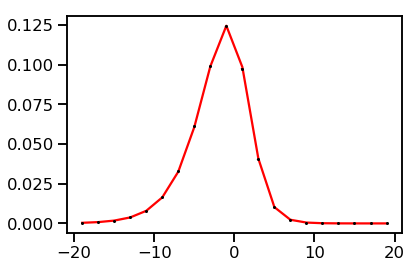

In [149]:
plt.errorbar(central_halos[0].v.r, mean_marginal_r[r],
          yerr =std_marginal_r[r], linestyle = '', 
             marker='o', markersize=2, color='black')

plt.plot(central_halos[0].v.r, total_marginal_r[r], color='red')

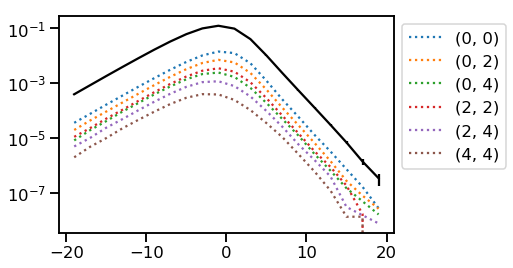

In [191]:
r = 15
ax = plt.subplot()
ax.set_yscale("log", nonposy='clip')
plt.errorbar(central_halos[0].v.r, mean_marginal_r[r],
          yerr =std_marginal_r[r], color='black')


for i in range(0,len(mass_bins_c),2):
    for j in range(i,len(mass_bins_c),2):
        weight = n_halos[i]/total_n_halos * n_halos[j]/total_n_halos
        label = f'({i}, {j})'
        plt.plot(central_halos[0].v.r, weight * mean_mass_marginal_r[r, i, j],
                  label=label, linestyle='dotted')
        
plt.legend(bbox_to_anchor=[1,1])


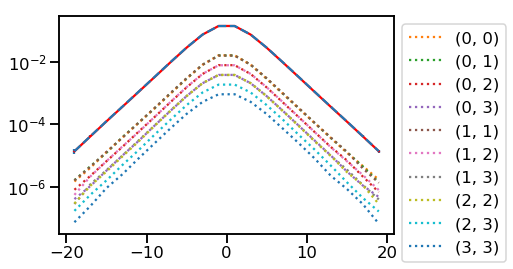

In [190]:
ax = plt.subplot()
ax.set_yscale("log", nonposy='clip')
plt.errorbar(central_halos[0].v.t, mean_marginal_t[r],
             yerr =std_marginal_t[r], linestyle='--')


plt.plot(central_halos[0].v.t, total_marginal_t[r], color='red')

for i in range(0,4,1):
    for j in range(i,4,1):
        
        label = f'({i}, {j})'

        weight = n_halos[i]/total_n_halos * n_halos[j]/total_n_halos
        plt.plot(central_halos[0].v.t, weight * mean_mass_marginal_t[r, i, j],
                 
                     label=label, linestyle='dotted')
        
plt.legend(bbox_to_anchor=[1,1])


# Test sqrt approximation to recover full marginals

In [228]:
sqrt_mass_jointpdf = np.zeros_like(mean_mass_jointpdf)
for i in range(len(mass_bins_c)):
    for j in range(len(mass_bins_c)):
        if i == j:
            sqrt_mass_jointpdf[:, i, j, ...] = mean_mass_jointpdf[:,i,j,...]
        else:
            sqrt_mass_jointpdf[:, i, j, ...] = np.sqrt(mean_mass_jointpdf[:,i,i,...]\
                                                        *mean_mass_jointpdf[:,j,j,...])
            
m1 = n_halos[np.newaxis,:, np.newaxis, np.newaxis, np.newaxis] * sqrt_mass_jointpdf/total_n_halos
m2 = n_halos[np.newaxis,np.newaxis, :, np.newaxis, np.newaxis] * m1 /total_n_halos

sqrt_jointpdf =  np.sum(np.sum(m2,axis=1),axis=1)

sqrt_marginal_r = mass_sample[0].wvt * np.sum(sqrt_jointpdf, axis = -2)
sqrt_marginal_t = mass_sample[0].wvt * np.sum(sqrt_jointpdf, axis = -1)

In [229]:
zero_mass_jointpdf = np.zeros_like(mean_mass_jointpdf)
for i in range(len(mass_bins_c)):
    zero_mass_jointpdf[:, i, i, ...] = mean_mass_jointpdf[:,i,i,...]

m1 = n_halos[np.newaxis,:, np.newaxis, np.newaxis, np.newaxis] * zero_mass_jointpdf/total_n_halos
m2 = n_halos[np.newaxis,np.newaxis, :, np.newaxis, np.newaxis] * m1 /total_n_halos

zero_jointpdf =  np.sum(np.sum(m2,axis=1),axis=1)

zero_marginal_r = mass_sample[0].wvt * np.sum(zero_jointpdf, axis = -2)
zero_marginal_t = mass_sample[0].wvt * np.sum(zero_jointpdf, axis = -1)

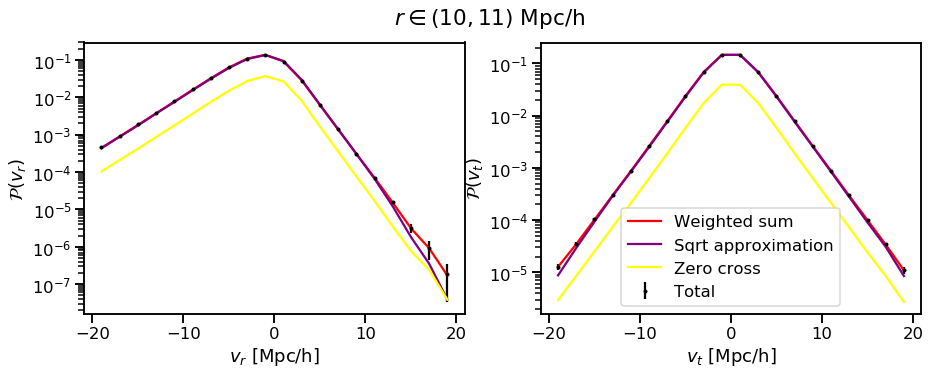

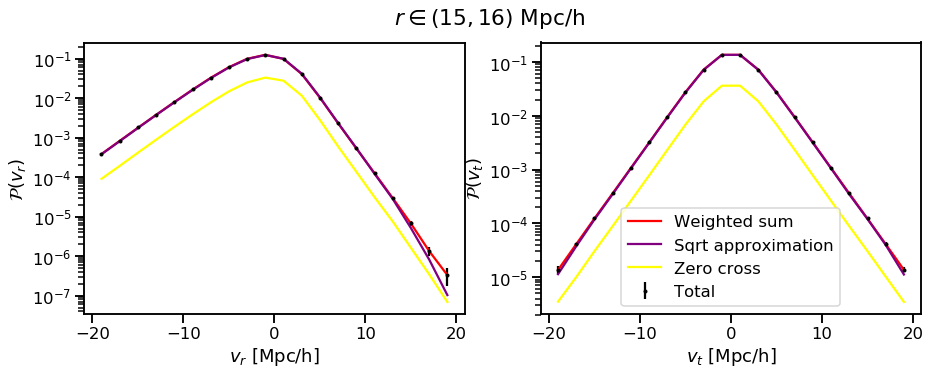

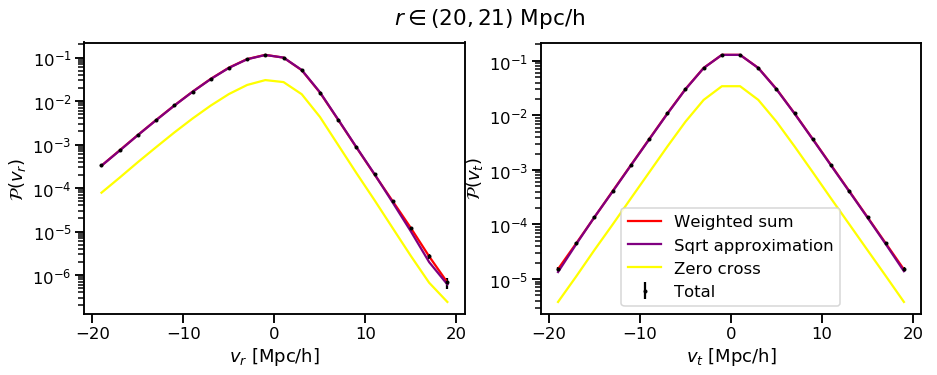

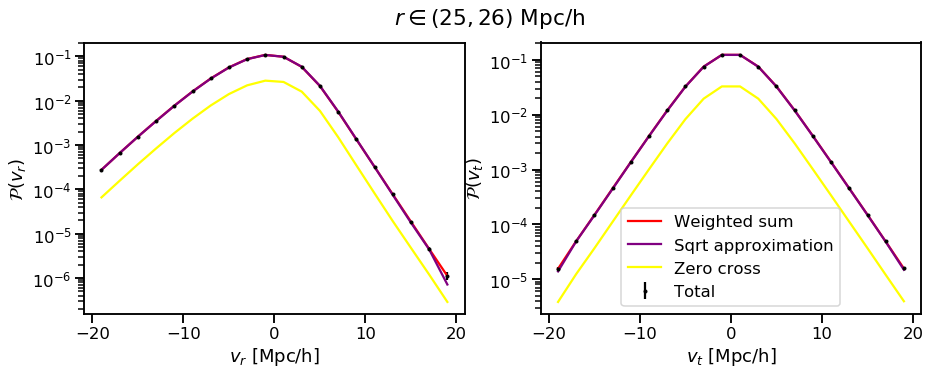

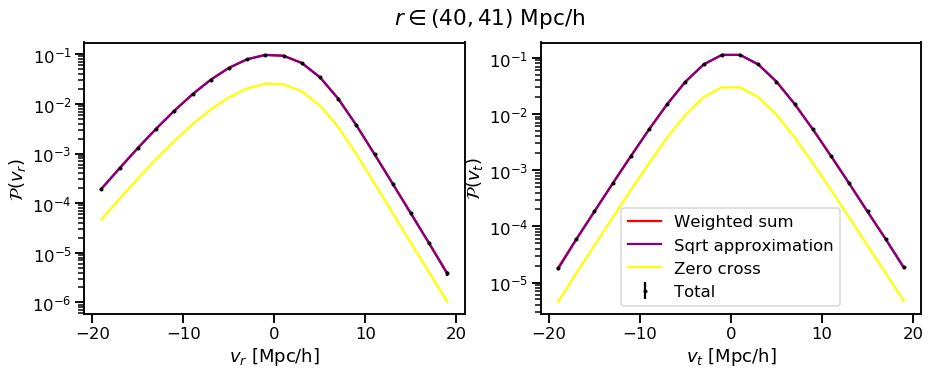

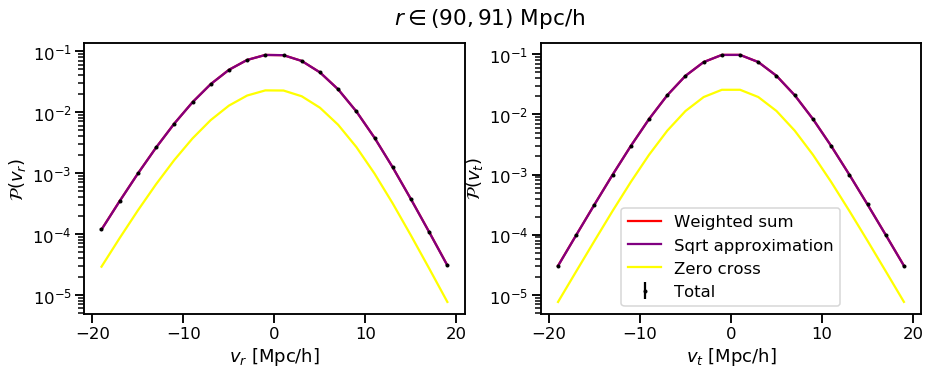

In [230]:
rbins = [10,15,20,25,40,90]
for r in rbins:
    fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols=2, figsize=(15,5))

    plt.suptitle(f'$r \in ({r}, {r+1})$ Mpc/h')

    ax1.set_yscale("log", nonposy='clip')
    ax1.errorbar(central_halos[0].v.r, mean_marginal_r[r],
              yerr =std_marginal_r[r], linestyle = '', 
                 marker = 'o', color='black', markersize=3, label='Total')

    ax1.plot(central_halos[0].v.r, total_marginal_r[r], color='red', 
             label = 'Weighted sum')
    ax1.plot(central_halos[0].v.r, sqrt_marginal_r[r], color='purple', 
            label = 'Sqrt approximation')
    ax1.plot(central_halos[0].v.r, zero_marginal_r[r], color='yellow', 
            label = 'Zero cross')

    ax1.set_xlabel(r'$v_r$ [Mpc/h]')
    ax1.set_ylabel(r'$\mathcal{P}(v_r)$')
    #ax1.legend()

    ax2.set_yscale("log", nonposy='clip')
    ax2.errorbar(central_halos[0].v.t, mean_marginal_t[r],
              yerr =std_marginal_t[r], linestyle = '', 
                 marker = 'o', color='black', markersize=3, label='Total')

    ax2.plot(central_halos[0].v.t, total_marginal_t[r], color='red', 
             label = 'Weighted sum')
    ax2.plot(central_halos[0].v.t, sqrt_marginal_t[r], color='purple', 
            label = 'Sqrt approximation')
    ax2.plot(central_halos[0].v.t, zero_marginal_t[r], color='yellow', 
            label = 'Zero cross')

    ax2.set_xlabel(r'$v_t$ [Mpc/h]')
    ax2.set_ylabel(r'$\mathcal{P}(v_t)$')
    ax2.legend()
    plt.show()